In [1]:
import xarray as xr
import numpy as np
import numpy as np
import xarray as xr
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [2]:
diri = "/groups/FutureWind/SFCRAD/"
models = [
    "ACCESS-CM2", "CanESM5", "CMCC-CM2-SR5", "CMCC-ESM2",
    "HadGEM3-GC31-LL", "HadGEM3-GC31-MM", "MRI-ESM2-0"
]
variable_names = {"rsds", "rsdsdiff", "tas"}

variants = ["r1i1p1f1", "r1i1p2f1", "r1i1p1f1", "r1i1p1f1", "r1i1p1f3", "r1i1p1f3", "r1i1p1f1"]  # Corresponding variant for the model
period = ["historical","ssp585"]


In [3]:
bias_fact_folder="/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/bias_factors/"

In [4]:
ds=xr.open_dataset("/groups/FutureWind/SFCRAD/ACCESS-CM2/ssp585/r1i1p1f1/rsds_rsdsdiff_tas_2093.nc")
ds

<xarray.Dataset> Size: 66MB
Dimensions:   (time: 2920, lat: 44, lon: 43)
Coordinates:
  * lon       (lon) float32 172B -29.06 -27.19 -25.31 ... 45.94 47.81 49.69
  * lat       (lat) float32 176B 20.62 21.88 23.12 24.38 ... 71.88 73.12 74.38
  * time      (time) datetime64[ns] 23kB 2093-01-01T01:30:00 ... 2093-12-31T2...
Data variables:
    rsds      (time, lat, lon) float32 22MB ...
    rsdsdiff  (time, lat, lon) float32 22MB ...
    tas       (time, lat, lon) float32 22MB ...
Attributes:
    data_source:    Processed data from CMIP6 runs
    experiment:     ssp585
    source:         ACCESS-CM2
    variant_label:  r1i1p1f1
    data_written:   27/04/2025 18:34

In [4]:
import os, re, glob

def collect_files(base_path, models, variants, periods):
    files_model = {}

    year_ranges = {
        "historical": range(1980, 2015),
        "ssp585":     range(2065, 2100)
    }

    for model, variant in zip(models, variants):
        files_model.setdefault(model, {})
        files_model[model].setdefault(variant, {})

        for period in periods:
            search_path = os.path.join(base_path, model, period, variant)
            pattern     = os.path.join(search_path, "rsds_rsdsdiff_tas_*.nc")
            print(f"Searching in: {pattern}")  # DEBUG

            matched = glob.glob(pattern)

            filtered = []
            for fp in matched:
                match = re.search(r"_(\d{4})\.nc$", os.path.basename(fp))
                if match:
                    year = int(match.group(1))
                    if year in year_ranges[period]:
                        filtered.append(fp)

            files_model[model][variant][period] = filtered

    return files_model


In [5]:
import re
files= collect_files(diri, models, variants, period)

Searching in: /groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_*.nc
Searching in: /groups/FutureWind/SFCRAD/ACCESS-CM2/ssp585/r1i1p1f1/rsds_rsdsdiff_tas_*.nc
Searching in: /groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_*.nc
Searching in: /groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_*.nc
Searching in: /groups/FutureWind/SFCRAD/CMCC-CM2-SR5/historical/r1i1p1f1/rsds_rsdsdiff_tas_*.nc
Searching in: /groups/FutureWind/SFCRAD/CMCC-CM2-SR5/ssp585/r1i1p1f1/rsds_rsdsdiff_tas_*.nc
Searching in: /groups/FutureWind/SFCRAD/CMCC-ESM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_*.nc
Searching in: /groups/FutureWind/SFCRAD/CMCC-ESM2/ssp585/r1i1p1f1/rsds_rsdsdiff_tas_*.nc
Searching in: /groups/FutureWind/SFCRAD/HadGEM3-GC31-LL/historical/r1i1p1f3/rsds_rsdsdiff_tas_*.nc
Searching in: /groups/FutureWind/SFCRAD/HadGEM3-GC31-LL/ssp585/r1i1p1f3/rsds_rsdsdiff_tas_*.nc
Searching in: /groups/FutureWind/SFCRAD/HadGEM3-GC31-MM/historical/r1i1p1f

In [6]:
files

{'ACCESS-CM2': {'r1i1p1f1': {'historical': ['/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_1988.nc',
    '/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_1994.nc',
    '/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_2007.nc',
    '/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_2003.nc',
    '/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_2010.nc',
    '/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_1986.nc',
    '/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_1984.nc',
    '/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_1990.nc',
    '/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_1998.nc',
    '/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_2001.nc',
    '/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f

In [7]:
output_dir="/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/regridded_climate/"

In [42]:
import os
import xarray as xr

def read_and_average_cmip_bc(file_list, bf_direct, bf_diffuse, bf_temp, bf_total):
    ds_all = xr.open_mfdataset(file_list, combine="by_coords")
    rsdsdir = ds_all["rsds"] - ds_all["rsdsdiff"]
    rsds_bc=ds_all['rsds']*bf_total
    rsdsdir_bc = (rsdsdir * bf_direct).clip(min=0)
    rsdsdiff_bc = ds_all["rsdsdiff"] * bf_diffuse
    tas_bc      = ds_all["tas"]      * bf_temp
    return rsdsdir_bc.mean('time'), rsds_bc.mean("time"), rsdsdiff_bc.mean("time"), tas_bc.mean("time")

results = {}
for model, variant_dict in files.items():
    print(f"Model: {model}")
    for variant, periods_dict in variant_dict.items():
        print(f"  Variant: {variant}")
        for period, file_list in periods_dict.items():
            print(f"    Period: {period}")

            if not file_list:
                print("      No files available. Skipping.")
                continue

            # Select years if needed (you already did filtering when collecting)
            if period == "historical":
                years = range(1980, 2015)
            elif period in ("ssp585", "rcp85"):
                years = range(2065, 2100)
            else:
                raise ValueError(f"Unknown period {period!r}")

            # Load bias factors (once per model)
            bf_dir = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"
            bf_direct  = xr.open_dataset(f"{bf_dir}/direct_bias_factor_{model}.nc")['bias_factor']
            bf_diffuse = xr.open_dataset(f"{bf_dir}/diffuse_bias_factor_{model}.nc")['bias_factor']
            bf_temp    = xr.open_dataset(f"{bf_dir}/temp_bias_factor_{model}.nc")['bias_factor']
            bf_total   = xr.open_dataset(f"{bf_dir}/total_bias_factor_{model}.nc")['bias_factor']
            print("      Opened bias factors.")

            # Apply and average
            avg_rsdsdir, avg_rsds, avg_rsdsdiff, avg_tas = read_and_average_cmip_bc(file_list, bf_direct, bf_diffuse, bf_temp, bf_total)
            print("      Averages computed.\n")
            results.setdefault(model, {}).setdefault(variant, {})[period] = {
            "rsds": avg_rsds,
            "rsdsdir": avg_rsdsdir,
            "rsdsdiff": avg_rsdsdiff,
            "tas": avg_tas,
        }

            print('saved results')

Model: ACCESS-CM2
  Variant: r1i1p1f1
    Period: historical
      Opened bias factors.
      Averages computed.

saved results
    Period: ssp585
      Opened bias factors.
      Averages computed.

saved results
Model: CanESM5
  Variant: r1i1p2f1
    Period: historical
      Opened bias factors.
      Averages computed.

saved results
    Period: ssp585
      Opened bias factors.
      Averages computed.

saved results
Model: CMCC-CM2-SR5
  Variant: r1i1p1f1
    Period: historical
      Opened bias factors.
      Averages computed.

saved results
    Period: ssp585
      Opened bias factors.
      Averages computed.

saved results
Model: CMCC-ESM2
  Variant: r1i1p1f1
    Period: historical
      Opened bias factors.
      Averages computed.

saved results
    Period: ssp585
      Opened bias factors.
      Averages computed.

saved results
Model: HadGEM3-GC31-LL
  Variant: r1i1p1f3
    Period: historical
      Opened bias factors.
      Averages computed.

saved results
    Period: s

In [62]:
model   = "MRI-ESM2-0"  # Example model, change as needed
variant = "r1i1p1f1"
period  = "ssp585"

rsds     = results[model][variant][period]["rsds"]
rsdsdiff = results[model][variant][period]["rsdsdiff"]
tas      = results[model][variant][period]["tas"]
rsdsdir= rsds - rsdsdiff

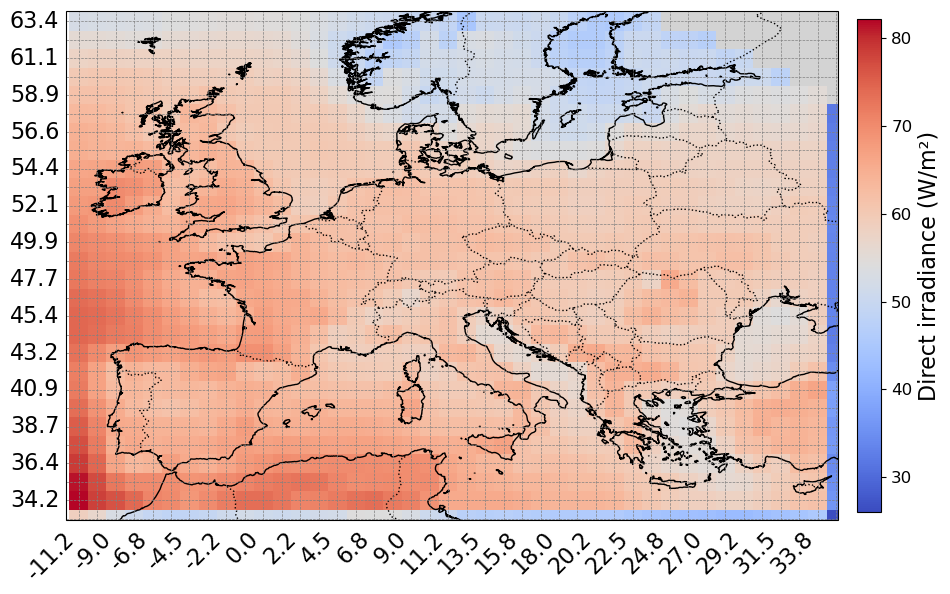

In [63]:
from plots import map_plots_lon
map_plots_lon(rsdsdiff,
              cmap='coolwarm',
              setnan=True,
              vmin=None,
              vmax=None,
              title=None,
              label='Direct irradiance (W/m²)',)

In [30]:
ds_target_grid="/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/europe_1x1.nc"
target_grid = xr.open_dataset(ds_target_grid)


In [32]:
model_regrid_method = {
    "ACCESS-CM2":         "bilinear",
    "CanESM5":            "bilinear",
    "CMCC-CM2-SR5":       "conservative",
    "CMCC-ESM2":          "conservative",
    "HadGEM3-GC31-LL":    "bilinear",
    "HadGEM3-GC31-MM":    "conservative",
    "MRI-ESM2-0":         "bilinear",
}

In [89]:
import xarray as xr
import xesmf as xe

import xesmf as xe
import xarray as xr

def regrid_to_target(data_array, target_grid, model_name):
    method = model_regrid_method.get(model_name, "bilinear")  # default to bilinear
    regridder = xe.Regridder(data_array, target_grid, method, periodic=True, reuse_weights=False)
    return regridder(data_array)

# Deltas (regridded then aggregated)
delta_rsds_by_period = {}
delta_rsdsdir_by_period = {}
delta_rsdsdiff_by_period = {}
delta_tas_by_period = {}

# Accumulators for differences (one per model, already computed on native grid)
delta_rsds_all = []
delta_rsdsdir_all = []
delta_rsdsdiff_all = []
delta_tas_all = []

# Compute per-model delta on native grid, then regrid, then stack for median
eps = 1e-6  # small constant to avoid division by zero

for model, variant_dict in results.items():
    for variant, period_dict in variant_dict.items():
        if "historical" in period_dict and "ssp585" in period_dict:
            try:
                rsds_hist     = period_dict["historical"]["rsds"]
                rsds_ssp      = period_dict["ssp585"]["rsds"]
                rsdsdir_hist  = period_dict["historical"]["rsdsdir"]
                rsdsdir_ssp   = period_dict["ssp585"]["rsdsdir"]
                rsdsdiff_hist = period_dict["historical"]["rsdsdiff"]
                rsdsdiff_ssp  = period_dict["ssp585"]["rsdsdiff"]
                tas_hist      = period_dict["historical"]["tas"]
                tas_ssp       = period_dict["ssp585"]["tas"]

                # Compute relative difference on original grid
                delta_rsds = (rsds_ssp - rsds_hist) / (rsds_hist + eps) * 100
                delta_rsdsdir = (rsdsdir_ssp - rsdsdir_hist) / (rsdsdir_hist + eps) * 100
                delta_rsdsdiff = (rsdsdiff_ssp - rsdsdiff_hist) / (rsdsdiff_hist + eps) * 100
                delta_tas = (tas_ssp - tas_hist) / (tas_hist + eps) * 100

                # Regrid each difference to target grid
                delta_rsds_regridded     = regrid_to_target(delta_rsds,     target_grid, model)
                delta_rsdsdir_regridded  = regrid_to_target(delta_rsdsdir,  target_grid, model)
                delta_rsdsdiff_regridded = regrid_to_target(delta_rsdsdiff, target_grid, model)
                delta_tas_regridded      = regrid_to_target(delta_tas,      target_grid, model)

                # Stack for median
                delta_rsds_all.append(delta_rsds_regridded.expand_dims(model=[model]))
                delta_rsdsdir_all.append(delta_rsdsdir_regridded.expand_dims(model=[model]))
                delta_rsdsdiff_all.append(delta_rsdsdiff_regridded.expand_dims(model=[model]))
                delta_tas_all.append(delta_tas_regridded.expand_dims(model=[model]))

                print(f"✅ Processed deltas for model: {model}")
            except Exception as e:
                print(f"⚠️ Failed for {model}: {e}")

# Compute median across regridded differences
if delta_rsds_all:
    delta_rsds_by_period["ssp585"]     = xr.concat(delta_rsds_all,     dim="model").median(dim="model")
    delta_rsdsdir_by_period["ssp585"]  = xr.concat(delta_rsdsdir_all,  dim="model").median(dim="model")
    delta_rsdsdiff_by_period["ssp585"] = xr.concat(delta_rsdsdiff_all, dim="model").median(dim="model")
    delta_tas_by_period["ssp585"]      = xr.concat(delta_tas_all,      dim="model").median(dim="model")
    print("✅ Computed final regridded median relative differences.")
else:
    print("⚠️ No models were successfully processed.")



    

✅ Processed deltas for model: ACCESS-CM2
✅ Processed deltas for model: CanESM5
✅ Processed deltas for model: CMCC-CM2-SR5
✅ Processed deltas for model: CMCC-ESM2
✅ Processed deltas for model: HadGEM3-GC31-LL
✅ Processed deltas for model: HadGEM3-GC31-MM
✅ Processed deltas for model: MRI-ESM2-0
✅ Computed final regridded median relative differences.


In [91]:
ds=xr.open_dataset("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/temp_diff_1x1/multi_model_median.nc")
ds

<xarray.Dataset> Size: 155kB
Dimensions:                                 (y: 40, x: 48, season: 4)
Coordinates:
  * x                                       (x) float64 384B -12.0 ... 35.0
    lon                                     (x) float64 384B ...
  * y                                       (y) float64 320B 33.0 34.0 ... 72.0
    lat                                     (y) float64 320B ...
  * season                                  (season) <U3 48B 'DJF' ... 'SON'
Data variables:
    abs_diff_all_ssp585_vs_historical       (y, x) float64 15kB ...
    rel_diff_all_ssp585_vs_historical       (y, x) float64 15kB ...
    abs_diff_seasonal_ssp585_vs_historical  (y, x, season) float64 61kB ...
    rel_diff_seasonal_ssp585_vs_historical  (y, x, season) float64 61kB ...
Attributes:
    description:  Multi-model median of regridded differences

In [92]:
abs_diff_temp=ds["abs_diff_all_ssp585_vs_historical"].sel(x=slice(-10.5, 34.5), y=slice(34, 63))
rel_diff_temp=ds["rel_diff_all_ssp585_vs_historical"]*100
min=rel_diff_temp.min().item()

In [114]:
import builtins  # to safely access the real min/max

vmin = builtins.min(
    float(delta_rsdsdir_by_period["ssp585"].min().compute()),
    float(delta_rsdsdiff_by_period["ssp585"].min().compute()),
)

vmax = builtins.max(
    float(delta_rsdsdir_by_period["ssp585"].max().compute()),
    float(delta_rsdsdiff_by_period["ssp585"].max().compute()),
)


In [131]:
print(delta_rsdsdiff_by_period["ssp585"].max().compute())

<xarray.DataArray ()> Size: 4B
array(2.7032695, dtype=float32)


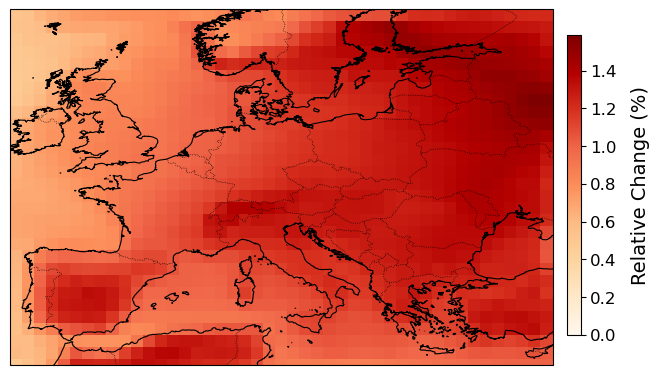

In [138]:
#ploting relative diff instead of abs values
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib as mpl
from matplotlib.colors import Normalize, TwoSlopeNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


data = delta_rsdsdir_by_period["ssp585"] # or any variable/map you want
#data_abs_max = float(abs(data).quantile(1).compute())  # or .max().compute()
data=rel_diff_temp
vmin = data.min().compute().item()  # Use the minimum value from the data
vmax = data.max().compute().item() # Use the maximum value from the data
#norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=data_abs_max)

#data=delta_rsdsdiff_by_period["ssp585"]
# Mask very small baseline or very low change values (optional)
#data = data.where(abs(data) > 0.05)

# Define colormap and normalization
#vmax = vmax
#vmin=vmin
#norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap("OrRd").copy()
cmap.set_bad(color='white')

# Projection
proj = ccrs.PlateCarree()

# Create figure and single axis
fig, ax = plt.subplots(
    figsize=(7, 5),
    subplot_kw={'projection': proj},
    constrained_layout=False
)

# Plot
im = data.plot.pcolormesh(
    ax=ax,
    cmap=cmap,
    norm=norm,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
    add_labels=False
)

# Map features
ax.coastlines("10m", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.5)
ax.set_extent([-10.5, 34.5, 34, 63.5], crs=proj)
ax.set_xticks([]); ax.set_yticks([])
#ax.set_title("Relative Change in Direct Irradiance (%) across all models", fontsize=16, pad=8)

# Colorbar
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6]) 
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm._A = []
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.set_label("Relative Change (%)", fontsize=14, labelpad=10)
cbar.ax.tick_params(labelsize=12)

# Save or show
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/tas_relative_change.pdf", dpi=300, bbox_inches='tight')
plt.show()



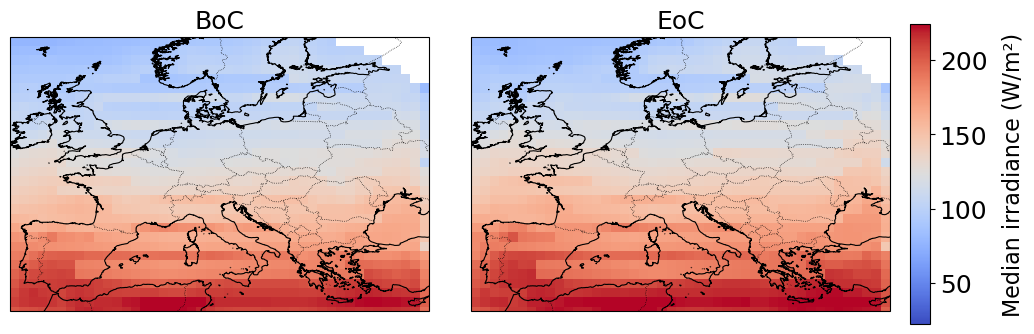

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib as mpl
from matplotlib.colors import Normalize

# -- SELECT YOUR DATA DICTIONARY --
data_dict = median_rsds_by_period  # or rsdsdiff / tas if desired

# Define periods and their display names
periods = ['historical', 'ssp585']
titles = ['BoC', 'EoC']

# Get min/max across both periods
vmin = min(data_dict['historical'].min().compute(), data_dict['ssp585'].min().compute(), 0)
#vmax = max(data_dict['historical'].max().compute(), data_dict['ssp585'].max().compute())
vmax = max(
    data_dict['historical'].quantile(0.99).compute(),
    data_dict['ssp585'].quantile(0.99).compute()
)

data_masked = data.where(data > 5)
# Define colormap and normalization
cmap = plt.get_cmap("coolwarm").copy()
cmap.set_bad(color='white')
norm = Normalize(vmin=None, vmax=vmax)

# Projection
proj = ccrs.PlateCarree()

# Create subplots
fig, axes = plt.subplots(
    1, 2,
    figsize=(10, 5),
    subplot_kw={'projection': proj},
    constrained_layout=False
)



for ax, period, title in zip(axes, periods, titles):
    data = data_dict[period].where(data_dict[period] > 20)

    im = data.plot.pcolormesh(
        ax=ax,
        cmap=cmap,
        norm=norm,
        transform=ccrs.PlateCarree(),
        add_colorbar=False,
        add_labels=False
    )

    ax.coastlines("10m", linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.5)
    ax.set_extent([-10.5, 34.5, 34, 63.5], crs=proj)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=18, pad=6)

# Adjust spacing
fig.subplots_adjust(
    left=0.02, right=0.90,
    top=0.92, bottom=0.08,
    wspace=0.1, hspace=0
)

# Colorbar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # x, y, width, height

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm._A = []
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.set_label('Median irradiance (W/m²)', fontsize=16, labelpad=10)
cbar.ax.tick_params(labelsize=18)

# Optional save
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/median_rsds_boc_eoc_1x2.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [75]:
import xesmf as xe

def regrid_to_target(data_array, target_grid, model_name):
    method = model_regrid_method.get(model_name, "bilinear")  # default to bilinear
    regridder = xe.Regridder(data_array, target_grid, method, periodic=True, reuse_weights=False)
    return regridder(data_array)

# Output structure: [model][variant][period][variable]
regridded_results = {}

for model, variant_dict in results.items():
    for variant, period_dict in variant_dict.items():
        for period in ["historical", "ssp585"]:
            if period in period_dict:
                # Load and regrid all variables
                rsds     = regrid_to_target(period_dict[period]["rsds"],     target_grid, model)
                rsdsdir  = regrid_to_target(period_dict[period]["rsdsdir"],  target_grid, model)
                rsdsdiff = regrid_to_target(period_dict[period]["rsdsdiff"], target_grid, model)
                tas      = regrid_to_target(period_dict[period]["tas"],      target_grid, model)

                # Store regridded data
                regridded_results.setdefault(model, {}).setdefault(variant, {}).setdefault(period, {})["rsds"]     = rsds
                regridded_results[model][variant][period]["rsdsdir"]  = rsdsdir
                regridded_results[model][variant][period]["rsdsdiff"] = rsdsdiff
                regridded_results[model][variant][period]["tas"]      = tas

    print(f"✅ Stored regridded outputs for model: {model}")


✅ Stored regridded outputs for model: ACCESS-CM2
✅ Stored regridded outputs for model: CanESM5
✅ Stored regridded outputs for model: CMCC-CM2-SR5
✅ Stored regridded outputs for model: CMCC-ESM2
✅ Stored regridded outputs for model: HadGEM3-GC31-LL
✅ Stored regridded outputs for model: HadGEM3-GC31-MM
✅ Stored regridded outputs for model: MRI-ESM2-0


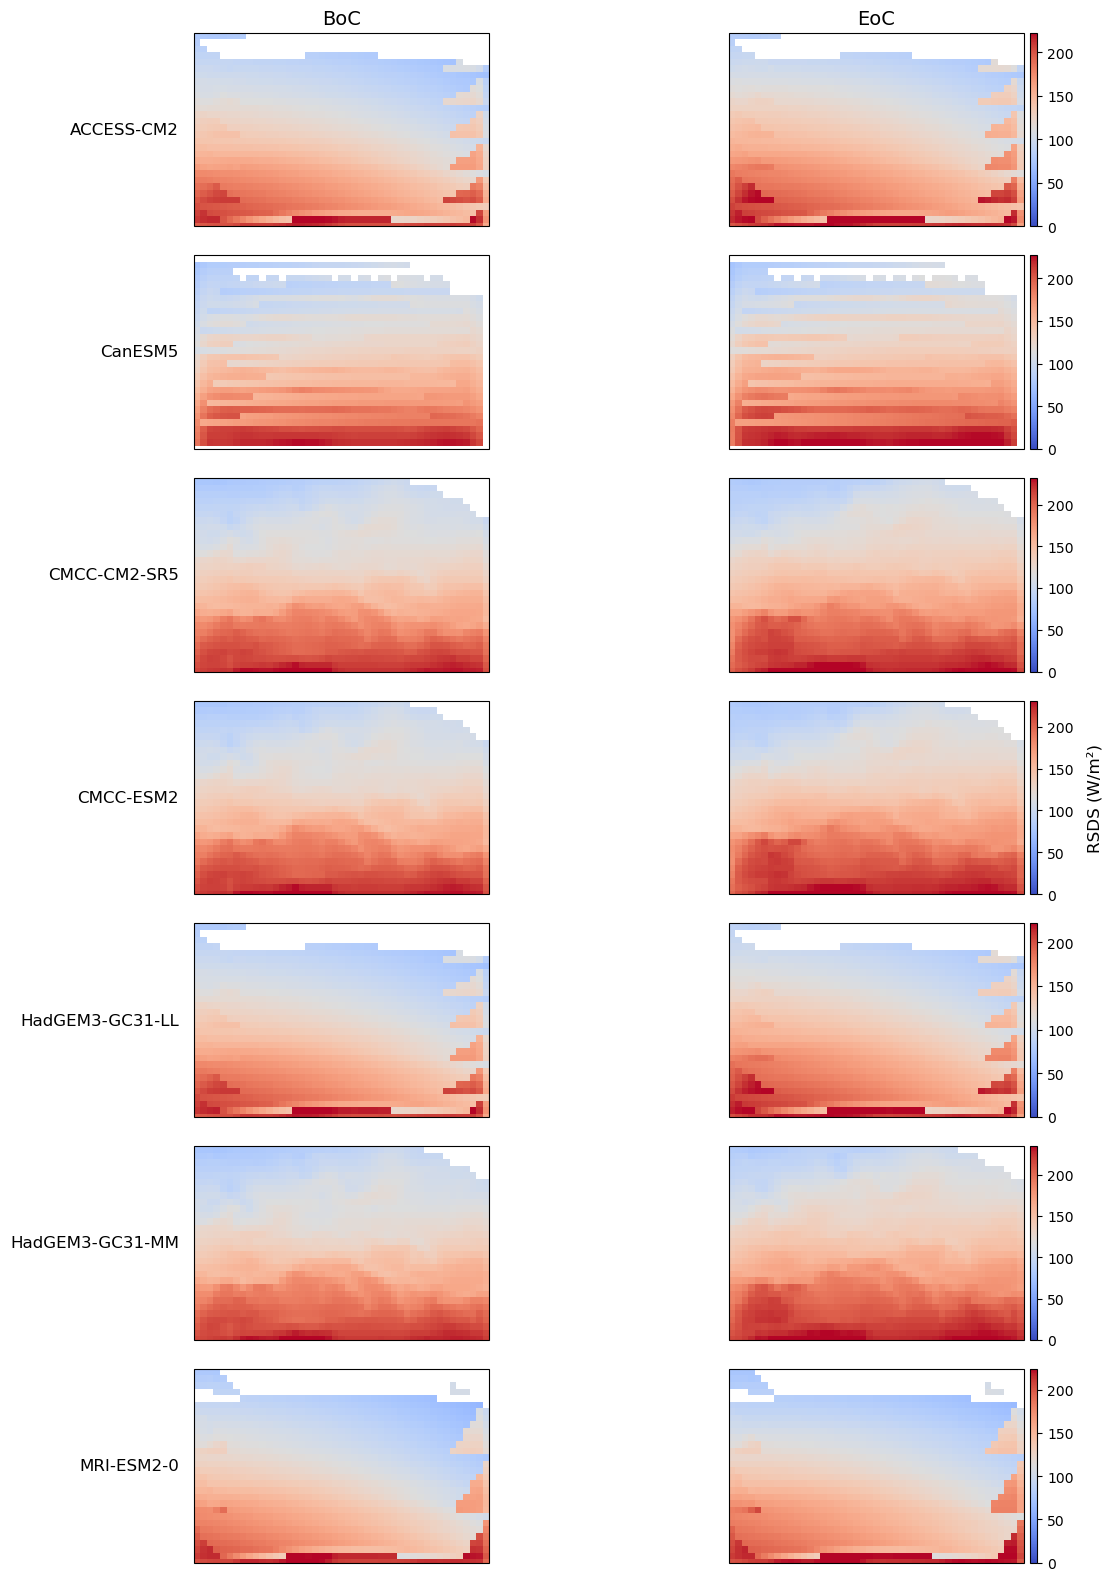

In [80]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Configuration
models = list(regridded_results.keys())
periods = ["historical", "ssp585"]
titles = ["BoC", "EoC"]
proj = ccrs.PlateCarree()

fig, axes = plt.subplots(
    nrows=7, ncols=2,
    figsize=(12, 17),
    subplot_kw={'projection': proj},
    constrained_layout=False
)

for i, model in enumerate(models):
    for j, period in enumerate(periods):
        ax = axes[i, j]
        # Get the first available variant for this model
        variant = list(regridded_results[model].keys())[0]
        data = regridded_results[model][variant][period]["rsds"]

        # Mask
        masked_array = np.ma.masked_where(data <= 0.5, data)

        # Get vmin/vmax for this model (across both periods)
        d_boc = regridded_results[model][variant]["historical"]["rsds"]
        d_eoc = regridded_results[model][variant]["ssp585"]["rsds"]
        vmin = min(d_boc.quantile(0.01).compute(), d_eoc.quantile(0.01).compute())
        vmax = max(d_boc.quantile(0.99).compute(), d_eoc.quantile(0.99).compute())

        norm = Normalize(vmin=vmin, vmax=vmax)
        cmap = plt.get_cmap("coolwarm")
        cmap.set_bad("white")

        # Plot
        im = ax.pcolormesh(data["lon"], data["lat"], masked_array, cmap=cmap, norm=norm,
                        transform=ccrs.PlateCarree(), shading="auto")
        ax.set_extent([-10.5, 34.5, 34, 63.5], crs=proj)

        # Titles
        if i == 0:
            ax.set_title("BoC" if j == 0 else "EoC", fontsize=14)
        if j == 0:
            ax.text(-0.05, 0.5, model, va='center', ha='right', fontsize=12, transform=ax.transAxes)

        # Colorbar only once per row (on EoC side)
        if j == 1:
            cax = inset_axes(
                ax, width="2.5%", height="100%", loc='lower left',
                bbox_to_anchor=(1.02, 0.0, 1, 1), bbox_transform=ax.transAxes, borderpad=0
            )
            sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
            sm._A = []
            cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
            if i == 3:  # only label one of them
                cbar.set_label("RSDS (W/m²)", fontsize=12, labelpad=10)
            cbar.ax.tick_params(labelsize=10)


# Adjust layout
fig.subplots_adjust(
    left=0.05, right=0.92,
    top=0.96, bottom=0.06,
    wspace=0.05, hspace=0.15
)

# Save or show
plt.savefig("rsds_7models_boc_eoc.pdf", dpi=300, bbox_inches=None)
plt.show()
